In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

C:\Users\rafae\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
dados_treinamento = pd.read_csv('dados_treinamento.csv')

In [3]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results



In [4]:
dados_treinamento['delivery_date'] = pd.to_datetime(dados_treinamento['order_delivered_customer_date'])
dados_treinamento['aproved_date'] = pd.to_datetime(dados_treinamento['order_aproved_at'])
dados_treinamento['delta time'] = dados_treinamento['delivery_date'] - dados_treinamento['aproved_date']
dados_treinamento['delta_days'] = (dados_treinamento['delta time'].dt.days)
aa = []
for e in dados_treinamento['delta_days']:
    try:
        aa.append(int(e))
    except:
        aa.append(50)
dados_treinamento['delta days'] = aa

In [5]:
df = dados_treinamento[['order_products_value', 'order_freight_value', 'product_description_lenght', 'product_photos_qty', 'review_score', 'review_comment_message', 'delta days']]

In [6]:
y = df['review_score']
x = df[['order_products_value', 'order_freight_value', 'product_description_lenght', 'product_photos_qty', 'delta days']]

In [7]:
results = regress(x,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     2183.
Date:                Thu, 08 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:11:57   Log-Likelihood:                -98756.
No. Observations:               60000   AIC:                         1.975e+05
Df Residuals:                   59994   BIC:                         1.976e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          4.6372      0.012    376.224      0.000       4.613       4.661
order_products_value        8.223e-05   3.12e-05      2.638      0.008    2.11e-05       0.000
order_freight_value           -0.0012      0.000     -4.392      0.000      -0.002      -0.001
product_description_lenght  4.351e-05   7.95e-06      5.474      0.000    2.79e-05    5.91e-05
product_photos_qty             0.0043      0.003      1.462      0.144      -0.001       0.010
delta days                    -0.0480      0.000   -102.149      0.000      -0.049      -0.047
==============================================================================
Omnibus:                     9757.440   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15712.255
Skew:                          -1.121   Prob(JB):                         0.00
Kurtosis:                       4.120   Cond. No.                     2.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
c = results.params["const"]
b0 = results.params["order_products_value"]
b1 = results.params["order_freight_value"]
b2 = results.params["product_description_lenght"]
b3 = results.params["product_photos_qty"]

In [9]:
df.head()

,order_products_value,order_freight_value,product_description_lenght,product_photos_qty,review_score,review_comment_message,delta days
0,349.90,13.84,625,1,5,NaN,5
1,15.00,15.10,1428,2,5,entrega em 2 dias produto c boa qualidade otim...,3
2,238.90,18.00,637,1,5,produto veio antes do prazo informado muito ob...,6
3,29.99,18.23,617,1,4,NaN,23
4,295.99,47.65,558,2,5,NaN,9


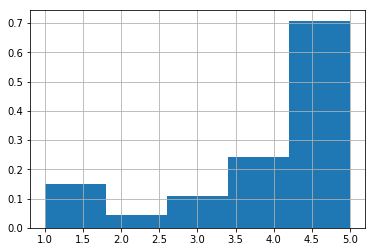

In [10]:
df['review_score'].hist(bins=5, density=True);

In [11]:
df.to_csv('dados_selecionados.csv')

,order_products_value,order_freight_value,product_description_lenght,product_photos_qty,delta_days
0,349.90,13.84,625,1,5.0
1,15.00,15.10,1428,2,3.0
2,238.90,18.00,637,1,6.0
3,29.99,18.23,617,1,23.0
4,295.99,47.65,558,2,9.0
5,160.00,19.00,1422,1,15.0
6,25.00,19.09,369,2,18.0
7,43.30,17.44,380,2,3.0
8,89.90,14.80,245,1,8.0
9,40.00,8.88,490,2,3.0


In [21]:
dados_treinamento['delta_days'][0]

5.0